# Компьютерный практикум 2021-2022

## Ограниченная круговая задача трех тел. Неустойчивые орбиты вокруг $L_1$

### Содержание:

1. Ограниченная круговая задача трех тел
    - введение
    - система координат
    - уравнения движения
    - обезразмеривание
3. Точки Лагранжа, численный расчет координат $L_1$
4. Неустойчивые орбиты вокруг $L_1$
5. Алгоритм расчета орбит вокруг $L_1$

## Ограниченная круговая задача трех тел


### Введение

- [Задача трех тел](https://en.wikipedia.org/wiki/Three-body_problem#Restricted_three-body_problem): три массивных тела движутся в их общем гравитационном поле. По заданным начальным положениям и скоростям необходимо вычислить положения и скорости всех трех тел в любой последующий момент времени.

- [Ограниченная задача трех тел](): аналогична задаче трех тел, но одно из тел имеет пренебрежимо малую массу. Из этого следует, что два массивных тела движутся по траекториям, которые можно вычислить аналитически (окружность, эллипс, гипербола, ...), и необходимо найти только положение и скорость безмассового тела (космического аппарата).

- [Ограниченная круговая задача трех тел](https://disk.yandex.ru/i/HfJaUW2Sm62td): аналогичная предыдущей задаче, но массивные тела движутся только по круговым орбитам относительно центра масс системы.



### Система координат

Существуют системы координат (СК), в которых уравнения движения выглядят проще, чем в других.
Для ОКЗТТ такой системой координат является следующая:
- центр $O$ СК расположен в барицентре (центре масс) системы массивных тел
- ось $OX$ направлена от тела большей массы к телу меньшей массы
- ось $OZ$ ортогональна плоскости движения массивных тел
- ось $OY$ дополняет СК до правой тройки



### Уравнения движения

(см. [Динамика Солнечной Системы](https://disk.yandex.ru/i/HfJaUW2Sm62td), с. 81)

$\begin{cases}
\ddot{x} - 2\dot{y} = \frac{\partial{U}}{\partial{x}} \\
\ddot{y} + 2\dot{x} = \frac{\partial{U}}{\partial{y}} \\
\ddot{z} = \frac{\partial{U}}{\partial{z}} \\
U = \frac{1}{2} (x^2 + y^2) + \frac{\mu_1}{r_1} + \frac{\mu_2}{r_2} \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

В более привычном виде:

$\begin{cases}
\ddot{x} = 2\dot{y} + x - \left( \mu_1 \frac{x + \mu_2}{r^3_1} + \mu_2 \frac{x - \mu_1}{r^3_2} \right) \\
\ddot{y} = -2\dot{x} + y - \left( \frac{\mu_1}{r^3_1} + \frac{\mu_2}{r^3_2} \right)y \\
\ddot{z} = - \left( \frac{\mu_1}{r^3_1} + \frac{\mu_2}{r^3_2} \right)z \\
r^2_1 = (x + \mu_2)^2 + y^2 + z^2 \\
r^2_2 = (x - \mu_1)^2 + y^2 + z^2
\end{cases}$

### Обезразмеривание

- $\mu_2 = \frac{m_2}{m_1 + m_2}$
- $\mu_1 = 1 - \mu2$

- Более массивное тело имеет массу $\mu_1$ и расположено в точке $(-\mu_2, 0, 0)$

- Менее массивное тело имеет массу $\mu_2$ b и расположено в точке с $(\mu_1, 0, 0)$

- Расстояние между массивными телами = 1.0
    - т.о. все координаты, заданные в километрах, необходимо разделить на расстояние между массивными телами в километрах


### Задание

Реализовать правую часть уравнений движения, представленных выше, в виде функции `crtbp_ode` с декоратором `cfunc` (см. предыдущий семинар).

### Точки лагранжа, расчет положения $L_1$

Точки Лагранжа - частные решения ОКЗТТ.
Если в любой из этих точек расположить невесомый космический аппарат с нулевой скоростью, то в рассматриваемой системе координат суммарное ускорение будет равно нулю.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Lagrange_points2.svg/1024px-Lagrange_points2.svg.png" width="200px" alt="Точки Лагранжа" />

Точка $L_1$ расположена на оси $OX$. Для вычисления её координаты $x$ запишем систему уравнений:

$\begin{cases}
0 = x - \left( \mu_1 \frac{x + \mu_2}{r^3_1} + \mu_2 \frac{x - \mu_1}{r^3_2} \right) \\
r^2_1 = (x + \mu_2)^2 \\
r^2_2 = (x - \mu_1)^2
\end{cases}$

Эту систему можно решить аналитически и получить координату $L_1$ как бесконечный ряд.

### Задание

Найти координату $L_1$ для системы Солнце-Земля численно с погрешностью $10^{-12}$:
- записать функцию $g(x) = f_{\ddot{x}}(0., (x, 0., 0., 0., 0., 0.))$, где $f_{\ddot{x}}$ - уравнение правой части СОДУ для $\ddot{x}$
- взять начальное приближение $x_0 = \frac{3}{4} \mu_1$
- численно найти корень функции $g(x)$
    - можно использовать функцию `root` из модуля `scipy.optimize`
- параметр $\mu_2 = 3.001348389698916e-06$

In [2]:
mu2 = 3.001348389698916e-06
mu1 = 1 - mu2
R = 149600000  # км, среднее расстояние Солнце-Земля
# xL1 = ?

In [4]:
(mu1 - xL1) * R # км, расстояние L1-Земля ~ 1.5 млн. км.

1491220.3794059805

### Неустойчивые орбиты вокруг точки $L_1$

Существует несколько классов орбит вокруг точки $L_1$.
Б**о**льшая часть из них является неустойчивой, т.к. это седловая точка.

В целом, орбиты можно разделить на периодические и квази-периодчические.
Орбиты некоторых классов можно увидеть [в этой работе](https://www.dropbox.com/s/wafy1jaylclngbv/Aksenov_ASR.pdf?dl=0).


### Алгоритм расчета орбит вокруг $L_1$

Будем искать неустойчивые орбиты, симметричные относительно плоскости $XOZ$.
Начальный вектор состояния будем брать на плоскости $XOZ$: $\vec{s}_0 = (x_0, 0., z_0, 0., 0., 0.)$.
Условие симметрии (квази-симметрии) говорит о том, что существует точка орбиты на плоскости $XOZ$, в которой скорость ортогональна этой плоскости. Таким образом, будем искать скорость $\vec{v}_0 = (0., \dot{y}_0, 0.)$, которая позволит двигаться максимально долго вокруг $L_1$.
Неустойчивость орбиты говорит о том, что если мы ошиблись с выбором скорости $\vec{v}_0$, то модуль координаты $x$ будет экспоненциально расти со временем.
Выберем плоскости $x = x_{min}$ и $x = x_{max}$ и будем интегрировать движение КА до тех пор, пока траектория не пересечет любую из плоскостей.
Если траектория пересекла плоскость $x = x_{min}$, то $\dot{y}_0$ нужно увеличить. Иначе - уменьшить.
Скорость, при которой траектрия не пересекает ни одну из плоскостей, соответствует орбите вокруг точки $L_1$. Эту скорость мы не можем найти точно, поэтому при вычислениях КА всегда будет пересекать одну из плоскостей.
Таким образом, требуется найти указанную скорость с заданной точностью.

При интегрировании взять шаг, равный 1 суткам, что в безразмерном виде равно $0.01721420632103996$.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from crtbp_ode import crtbp_ode, rk4_nsteps

d = (mu1 - xL1) * 0.99
xmin = xL1 - d
xmax = xL1 + d
h = 0.001721420632103996  # nd, одни сутки, шаг по времени

In [6]:
s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, 0.02

arr0 = rk4_nsteps(crtbp_ode, 0., s0, h, mc, 500)

In [7]:
s0 = np.zeros(6)
s0[[0, 2, 4]] = xL1 + d * 0.1, d * 0.1, -0.02

arr1 = rk4_nsteps(crtbp_ode, 0., s0, h, mc, 500)

Text(0, 0.5, 'y, nd')

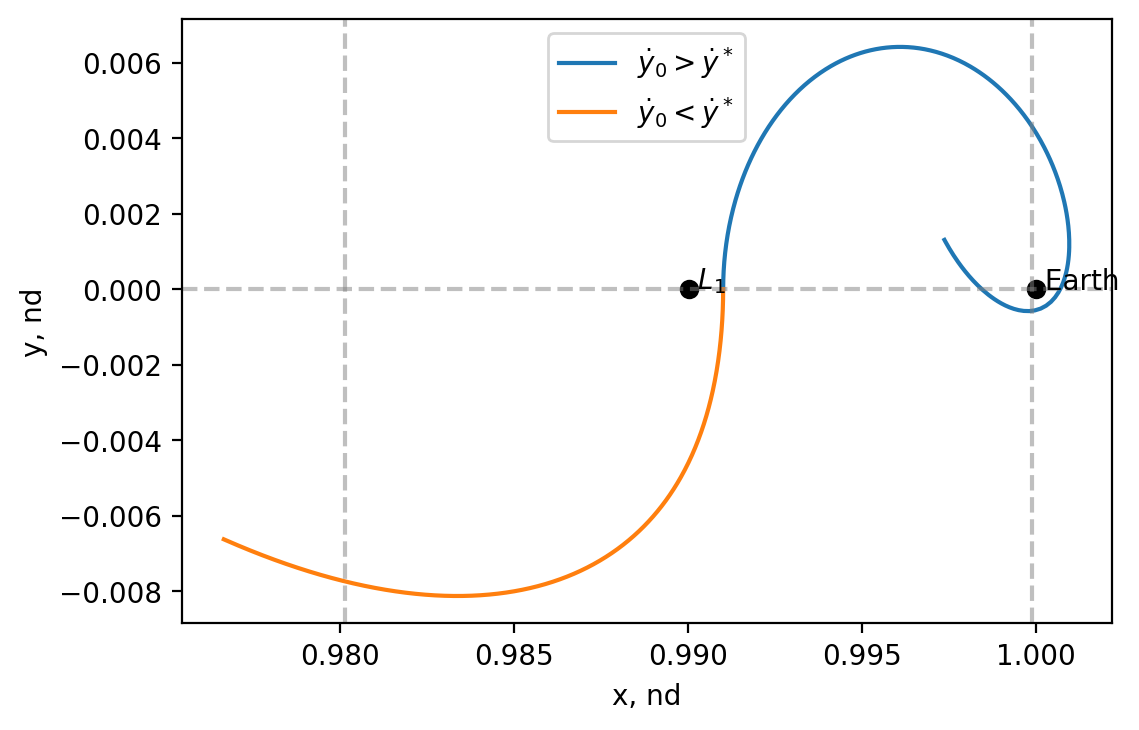

In [8]:
# График на плоскости XOY

plt.figure(dpi=200)

# траектории
plt.plot(arr0[:, 1], arr0[:, 2], label='$\dot{y}_0 > \dot{y}^*$')
plt.plot(arr1[:, 1], arr1[:, 2], label='$\dot{y}_0 < \dot{y}^*$')

# точка L1
plt.plot(xL1, 0., 'ok')
plt.text(xL1, 0., ' $L_1$')

# Земля
plt.plot(mu1, 0., 'ok')
plt.text(mu1, 0., ' Earth')

# Плоскости
plt.axvline(xmin, ls='--', color='gray', alpha=0.5)
plt.axvline(xmax, ls='--', color='gray', alpha=0.5)

# Ось OX
plt.axhline(0., ls='--', color='gray', alpha=0.5)

plt.legend()

plt.xlabel('x, nd')
plt.ylabel('y, nd')

### Задание

Модифицировать алгоритм интегрирования так, чтобы он останавливался при пересечении траекторией любой из плоскостей $x = x_{min}$ или $x = x_{max}$

In [10]:
pl = np.array([xmin, xmax])

### Задание

Реализовать функцию

get_plane$(\dot{y}_0) = \begin{cases} -1, x_f <= xmin \\ 1, x_f >= xmax \end{cases}$, где $x_f$ - координата $x$ КА в момент пересечения траекторией любой из плоскостей $x = x_{min}$ или $x = x_{max}$

### Задание

Найти с заданной точностью разрыв функции get_plane, т.е. значение скорости $\dot{y}^*$, с точностью $10^{-12}$.
В качестве начального вектора состояния взять рассмотренный выше. Начальный отрезок для уточнения скорости: $[-0.02, 0.02]$.

Можно использовать метод `bisect` из модуля `scipy.optimize`.